In [1]:
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import sqrt

In [2]:
#incase of unnecessary errors
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

#Import data
olympicsDataset=pd.DataFrame(pd.read_csv('C:/Analysis/dataset_olympics.csv'))

olympicsDataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
olympicsDataset.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN
69999,35658,Marek Fiurek,M,23.0,180.0,68.0,Czech Republic,CZE,1998 Winter,1998,Winter,Nagano,Nordic Combined,Nordic Combined Men's Team,NaN


In [4]:
olympicsDataset.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22887,12036,Blagoy Blagoev,M,23.0,168.0,82.0,Bulgaria,BUL,1980 Summer,1980,Summer,Moskva,Weightlifting,Weightlifting Men's Light-Heavyweight,Silver
60116,30784,Jos Durn Noguera,M,17.0,164.0,61.0,Spain,ESP,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Men's 200 metres Breaststroke,NaN
24448,12812,Klaus Bhle,M,28.0,180.0,84.0,Germany,GER,1964 Summer,1964,Summer,Tokyo,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",NaN
6505,3645,"Nikolaos ""Nikos"" Anastasiadis",M,25.0,NaN,NaN,Greece,GRE,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
43069,22211,Guillaume Coeckelberg,M,NaN,NaN,NaN,Belgium,BEL,1908 Summer,1908,Summer,London,Cycling,Cycling Men's 100 kilometres,NaN


In [5]:
olympicsDataset.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,70000.000000,70000,70000,67268.000000,53746.000000,52899.000000,70000,70000,70000,70000.000000,70000,70000,70000,70000,9690
unique,NaN,35556,2,NaN,NaN,NaN,827,226,51,NaN,2,42,65,744,3
top,NaN,Oksana Aleksandrovna Chusovitina,M,NaN,NaN,NaN,United States,USA,2016 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,29,51877,NaN,NaN,NaN,4979,5216,3675,NaN,58467,6034,10629,1738,3292
mean,18081.846986,NaN,NaN,25.644645,175.505303,70.900216,NaN,NaN,NaN,1977.766457,NaN,NaN,NaN,NaN,NaN
std,10235.613253,NaN,NaN,6.485239,10.384203,14.217489,NaN,NaN,NaN,30.103306,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,11.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,9325.750000,NaN,NaN,21.000000,168.000000,61.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,18032.000000,NaN,NaN,25.000000,175.000000,70.000000,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN
75%,26978.000000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
olympicsDataset.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
olympicsDataset.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [8]:
olympicsDataset.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [9]:
# Rename the column sex to gender and restructure the columns in table
olympicsDataset['Gender'] = olympicsDataset['Sex']

olympicsDataset = olympicsDataset[['ID','Name','Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year', 
                    'Season', 'City', 'Sport', 'Event','Medal']]
olympicsDataset

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


# Number of female athletic from 2006-2018

In [10]:
data = olympicsDataset[olympicsDataset['Year'] >= 2006].groupby('Gender')['ID'].count()
data
# From the dataset, Female number is the least (5692) while male have 7882

Gender
F    5692
M    7882
Name: ID, dtype: int64

# Compare Number of Female Sports from 2008-2016 and from 1896-2016

In [11]:
data = {}
data['playedSports'] = len(olympicsDataset[(olympicsDataset['Year'] >= 2006) &
                                         (olympicsDataset['Gender'] == 'F')]['Sport'].unique())
data['allSports'] = len(olympicsDataset[olympicsDataset['Gender'] == 'F']['Sport'].unique())

data
playedSports=set(olympicsDataset[(olympicsDataset['Year'] >= 2006) &(olympicsDataset['Gender'] == 'F')]['Sport'])
allSports=set(olympicsDataset[olympicsDataset['Gender'] == 'F']['Sport'])

allSports-playedSports

{'Alpinism', 'Art Competitions', 'Croquet'}

        OBSERVATION
Based on the analysis, it is observed that there are 52 sports recorded from

1896 to 2016. In contrast, from 2006 to 2016, there are records for 49 female 

sports. Consequently, there are 3 sports that are not played during the period 

of 2006-2016. 

Which include "Alpinism", "Croquet", "Art Competitions"

In [12]:
# Cleaning dataset

# Focus only from 2008-2016 and on sport like Athletics.
olympicsDataset=olympicsDataset[olympicsDataset['Year']>=2006]

# Replace Abbreviation of sex to full
olympicsDataset['Gender'].unique()
genderMap = {'M':'Male','F':'Female'}
olympicsDataset['Gender']=olympicsDataset['Gender'].map(genderMap)

olympicsDataset = olympicsDataset[olympicsDataset['Gender']=='Female']
olympicsDataset

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
79,21,Ragnhild Margrethe Aamodt,Female,27.0,163.0,NaN,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
80,22,Andreea Aanei,Female,22.0,170.0,125.0,Romania,ROU,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
136,49,Moonika Aava,Female,28.0,168.0,65.0,Estonia,EST,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,NaN
161,65,Patimat Abakarova,Female,21.0,165.0,49.0,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,67,Mariya Vasilyevna Abakumova (-Tarabina),Female,22.0,179.0,80.0,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69853,35577,Heather Margaret Fisher,Female,32.0,168.0,71.0,Great Britain,GBR,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN
69873,35592,Lilia Fisikovici (Tozlovanu-),Female,27.0,170.0,52.0,Moldova,MDA,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,NaN
69877,35594,Sari Kristiina Fisk,Female,34.0,163.0,65.0,Finland,FIN,2006,Winter,Torino,Ice Hockey,Ice Hockey Women's Ice Hockey,NaN
69943,35625,Eva-Maria Fitze,Female,23.0,159.0,48.0,Germany-2,GER,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Pairs,NaN


In [13]:
# Mode of Medals
olympicsDataset['Medal'].mode()

# Silver is the most gotten award given to female from 2006-2016

0    Silver
dtype: object

In [14]:
# Number of female athletic by season

olympicsDataset.groupby('Season')[['ID']].count()

# Olympics games are mainly played in the summer(4518) from 2008-2016 than winter
# (1174)

,ID
Season,
Summer,4518
Winter,1174


In [15]:
# Number of female medalist athletic
olympicsDataset[olympicsDataset['Medal'] != np.nan]['Medal'].count()

# Number of female medalist from 2006-2016 are 844


844

In [16]:
medalist=olympicsDataset[olympicsDataset['Medal'] != np.nan].groupby('Year')['Medal'].count()
medalist.sort_values(ascending=False)
# Female have won more awards in 2016(246) the least was 2006 with (45)

Year
2016    246
2012    242
2008    200
2014     56
2006     55
2010     45
Name: Medal, dtype: int64

# Find sample mean, median, mode, max, min variance and standard deviation 

In [17]:
# for height

data = {}
data['Mean'] = round(np.mean(olympicsDataset['Height']))
data['Median']=round(olympicsDataset[olympicsDataset['Height'] != np.nan]['Height'].median())
data['Mode'] =(olympicsDataset['Height']).mode()
data['Max']= round(np.max(olympicsDataset['Height']))
data['Min'] = round(np.min(olympicsDataset['Height']))
data['Variance'] = np.var(olympicsDataset['Height'], ddof = 1)
data['STDDEV'] = np.std(olympicsDataset['Height'], ddof = 1)
data['sqrt_count']=sqrt(len(olympicsDataset['Height']))
data

{'Mean': 169,
 'Median': 169,
 'Mode': 0    170.0
 dtype: float64,
 'Max': 203,
 'Min': 140,
 'Variance': 75.341480954498,
 'STDDEV': 8.679947059429452,
 'sqrt_count': 75.44534445544006}

In [18]:
# Find Standard error
Standard_error = round(data["STDDEV"]/data["sqrt_count"],2)
Standard_error

0.12

In [19]:
confidence_interval = {}
confidence_interval['confidence_lower'] = data['Mean']-1.96 *data["STDDEV"]/data['sqrt_count']
confidence_interval['confidence_upper'] = data['Mean']+1.96 *data["STDDEV"]/data['sqrt_count']
confidence_interval

{'confidence_lower': 168.774503034491, 'confidence_upper': 169.225496965509}

      OBSERVATION
1. The tallest person in your dataset has a height of 203, while the shortest 
person has a height of 140.

2.The mean rating for the dataset is 169, and the calculated 95% confidence interval
for the mean is approximately [168.6,169.1]. This interval suggests that, with 
95% confidence, the true population mean rating is likely to fall within this 
range.

3.The standard error of the sample mean is 0.116, indicating the expected 
variability of the sample mean from the true population mean


# Find sample mean, median, mode, max, min variance and staandard deviation for weight


In [20]:
data = {}
data['Mean'] = round(np.mean(olympicsDataset['Weight']))
data['Median']=round(olympicsDataset[olympicsDataset['Weight'] != np.nan]['Weight'].median())
data['Mode'] =(olympicsDataset['Weight']).mode()
data['Max']= round(np.max(olympicsDataset['Weight']))
data['Min'] = round(np.min(olympicsDataset['Weight']))
data['Variance'] = np.var(olympicsDataset['Weight'], ddof = 1)
data['STDDEV'] = np.std(olympicsDataset['Weight'], ddof = 1)
data['sqrt_count']=sqrt(len(olympicsDataset['Weight']))
data

{'Mean': 61,
 'Median': 60,
 'Mode': 0    60.0
 dtype: float64,
 'Max': 136,
 'Min': 34,
 'Variance': 111.03219120467479,
 'STDDEV': 10.537181369069947,
 'sqrt_count': 75.44534445544006}

In [21]:
# Find Standard error
Standard_error = round(data["STDDEV"]/data["sqrt_count"],2)
Standard_error

0.14

In [22]:
confidence_interval = {}
confidence_interval['confidence_lower'] = data['Mean']-1.96 *data["STDDEV"]/data['sqrt_count']
confidence_interval['confidence_upper'] = data['Mean']+1.96 *data["STDDEV"]/data['sqrt_count']
confidence_interval

{'confidence_lower': 60.72625381151815, 'confidence_upper': 61.27374618848185}

      OBSERVATION
1.The individual in our dataset with the highest weight is recorded at 136 units, 
while the individual with the lowest weight has a measurement of 34 units.

2.The mean rating for the dataset is 61, and the calculated 95% confidence interval
for the mean is approximately [60.72,61.27]. This interval suggests that, with 
95% confidence, the true population mean rating is likely to fall within this 
range.

3.The standard error of the sample mean is 0.141, indicating the expected 
variability of the sample mean from the true population mean


# performance score of female by name

In [23]:
name = olympicsDataset.groupby('Name')['Medal'].count()
name.sort_values(ascending=False)

# Marit Bjrgen have the highest performing score of 9 least is 
# Nataile Anne Coughlin with 7

Name
Marit Bjrgen                     9
Allyson Michelle Felix           8
Natalie Anne Coughlin (-Hall)    7
Simone Arianne Biles             5
Alicia Jayne Coutts              5
                                ..
Giulia Arcioni                   0
Giulia Conti                     0
Glbadam Babamyradowa             0
Gloria Asumnu                    0
zge Bayrak                       0
Name: Medal, Length: 3208, dtype: int64

In [24]:
# Probability that each countries will win gold medal in the next olympics games
# Sum all gold medals divide by country
dictAll = {'United States':41, 'Jamaica':26, 'Ethiopia':15, 'Russia':13, 'Great Britain':11}
def probabilityChecker(dictAll,medal):
    for i in dictAll:
        total_medals = sum(dictAll.values())
        eachMedals = dictAll[i]
        probabilityMedal = (eachMedals/total_medals)*100
        print(f'{total_medals} {medal} medals, with {i} winning {eachMedals} {medal} medals.')
        print(f'The probability of {i} winning is {probabilityMedal}')
        print('----------------------------------------------------------')
        
probabilityChecker(dictAll,'Gold')


106 Gold medals, with United States winning 41 Gold medals.
The probability of United States winning is 38.67924528301887
----------------------------------------------------------
106 Gold medals, with Jamaica winning 26 Gold medals.
The probability of Jamaica winning is 24.528301886792452
----------------------------------------------------------
106 Gold medals, with Ethiopia winning 15 Gold medals.
The probability of Ethiopia winning is 14.150943396226415
----------------------------------------------------------
106 Gold medals, with Russia winning 13 Gold medals.
The probability of Russia winning is 12.264150943396226
----------------------------------------------------------
106 Gold medals, with Great Britain winning 11 Gold medals.
The probability of Great Britain winning is 10.377358490566039
----------------------------------------------------------


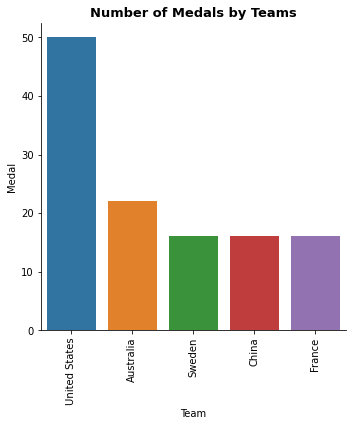

,Team,Medal
43,United States,50
1,Australia,22
40,Sweden,16
9,China,16
14,France,16


In [25]:
# Top 5 countries with the most silver medal from 2008-2016
sortNum=olympicsDataset[olympicsDataset['Medal'] == 'Silver']
sortNum = sortNum.groupby(['Team'])['Medal'].count().reset_index().sort_values(by='Medal', ascending=False).head(5)

sns.catplot(x='Team', y='Medal',data=sortNum, kind='bar').set_xticklabels(rotation=90)
plt.title('Number of Medals by Teams', fontsize=13, fontweight='bold')

plt.show()

sortNum


In [26]:
# Probability that each countries will win silver medal in the next olympics games
# Sum all silver medals divide by country

dictAll = {'United States':12, 'Jamaica':9, 'Russia':4, 'Trinidad and Tobago':3, 'Turkey':2}
probabilityChecker(dictAll,'Silver')


30 Silver medals, with United States winning 12 Silver medals.
The probability of United States winning is 40.0
----------------------------------------------------------
30 Silver medals, with Jamaica winning 9 Silver medals.
The probability of Jamaica winning is 30.0
----------------------------------------------------------
30 Silver medals, with Russia winning 4 Silver medals.
The probability of Russia winning is 13.333333333333334
----------------------------------------------------------
30 Silver medals, with Trinidad and Tobago winning 3 Silver medals.
The probability of Trinidad and Tobago winning is 10.0
----------------------------------------------------------
30 Silver medals, with Turkey winning 2 Silver medals.
The probability of Turkey winning is 6.666666666666667
----------------------------------------------------------


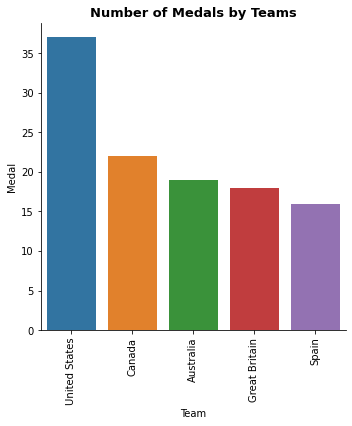

,Team,Medal
42,United States,37
6,Canada,22
1,Australia,19
15,Great Britain,18
37,Spain,16


In [27]:
# Top 5 countries with the most silver medal from 2008-2016
sortNum=olympicsDataset[olympicsDataset['Medal'] == 'Bronze']
sortNum = sortNum.groupby(['Team'])['Medal'].count().reset_index().sort_values(by='Medal', ascending=False).head(5)

sns.catplot(x='Team', y='Medal',data=sortNum, kind='bar').set_xticklabels(rotation=90)
plt.title('Number of Medals by Teams', fontsize=13, fontweight='bold')

plt.show()

sortNum


In [28]:
# Probability that each countries will win silver medal in the next olympics games
# Sum all silver medals divide by country

dictAll = {'United States':8, 'Ethiopia':7, 'Canada':6, 'Great Britain':5, 'Russia':4}
probabilityChecker(dictAll,'Bronze')


30 Bronze medals, with United States winning 8 Bronze medals.
The probability of United States winning is 26.666666666666668
----------------------------------------------------------
30 Bronze medals, with Ethiopia winning 7 Bronze medals.
The probability of Ethiopia winning is 23.333333333333332
----------------------------------------------------------
30 Bronze medals, with Canada winning 6 Bronze medals.
The probability of Canada winning is 20.0
----------------------------------------------------------
30 Bronze medals, with Great Britain winning 5 Bronze medals.
The probability of Great Britain winning is 16.666666666666664
----------------------------------------------------------
30 Bronze medals, with Russia winning 4 Bronze medals.
The probability of Russia winning is 13.333333333333334
----------------------------------------------------------


The analysis shows that united states althetics have won most of the medals
every year but they have a very close runner up Jamarica that have produces a very valuable and talented althetics which have 
help grow their achievement from 2008-2016. The acceptance of this structure have made other teams not to give it their all
leading to the contiual domination of the two countries